# SARA

In [27]:
# import dependencies
import requests
import json
import pandas as pd

# Import Bureau of Labor Statistics API Key
from api_keys import census_api_key

# Replace 'YOUR_API_KEY' with your actual census API key
API_KEY = census_api_key
state = 'state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56'

#URL
family_size_2022_url = f'https://api.census.gov/data/2022/acs/acs1?get=NAME,group(B11001)&for={state}&key={census_api_key}'
family_size_2021_url = f'https://api.census.gov/data/2021/acs/acs1?get=NAME,group(B11001)&for={state}&key={census_api_key}'
family_size_2019_url = f'https://api.census.gov/data/2019/acs/acs1?get=NAME,group(B11001)&for={state}&key={census_api_key}'
family_size_2018_url = f'https://api.census.gov/data/2018/acs/acs1?get=NAME,group(B11001)&for={state}&key={census_api_key}'
family_size_2017_url = f'https://api.census.gov/data/2017/acs/acs1?get=NAME,group(B11001)&for={state}&key={census_api_key}'


print(f'2022 Family Size URL: {family_size_2022_url}\n')
print(f'2021 Family Size URL: {family_size_2021_url}\n')
print(f'2019 Family Size URL: {family_size_2019_url}\n')
print(f'2018 Family Size URL: {family_size_2018_url}\n')
print(f'2017 Family Size URL: {family_size_2017_url}\n')

family_size_2022_json = requests.get(family_size_2022_url).json()
family_size_2021_json = requests.get(family_size_2021_url).json()
family_size_2019_json = requests.get(family_size_2019_url).json()
family_size_2018_json = requests.get(family_size_2018_url).json()
family_size_2017_json = requests.get(family_size_2017_url).json()


2022 Family Size URL: https://api.census.gov/data/2022/acs/acs1?get=NAME,group(B11001)&for=state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&key=9935e2b9b55f7614cfb428d835eb415fddc4e2f1

2021 Family Size URL: https://api.census.gov/data/2021/acs/acs1?get=NAME,group(B11001)&for=state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&key=9935e2b9b55f7614cfb428d835eb415fddc4e2f1

2019 Family Size URL: https://api.census.gov/data/2019/acs/acs1?get=NAME,group(B11001)&for=state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&key=9935e2b9b55f7614cfb428d835eb415fddc4e2f1

2018 Family Size URL: https://api.census.gov/data/2018/acs/acs1?get=NAME,group(B11001)&for=state:01,02,04,05,06,

In [30]:
family_size_2022_df = pd.DataFrame(requests.get(family_size_2022_url).json()[1:], columns=requests.get(family_size_2022_url).json()[0])

family_size_2022_df_cleaned = family_size_2022_df.rename(columns={
    'NAME': 'State',
    'B11001_001E': 'Estimated Total Household Type(Including Living Alone)',
    'B11001_003E': 'Estimated Total Family Households(Married Couples)',
    'B11001_005E': 'Estimated Total Family Households(Male Householder No Spouse)',
    'B11001_006E': 'Estimated Total Family Households(Female Householder No Spouse)',
    'B11001_007E': 'Estimated Total Family Household(Nonfamily Households)',
    'B11001_008E': 'Estimated Total Family Household(Householder Living Alone)'
})

family_size_2022_df_final = family_size_2022_df_cleaned[[
    'State',
    'Estimated Total Household Type(Including Living Alone)',
    'Estimated Total Family Households(Married Couples)',
    'Estimated Total Family Households(Male Householder No Spouse)',
    'Estimated Total Family Households(Female Householder No Spouse)',
    'Estimated Total Family Household(Nonfamily Households)',
    'Estimated Total Family Household(Householder Living Alone)'
]]


#remove duplicate NAME column
family_size_2022_df_final = family_size_2022_df_final.loc[:, ~family_size_2022_df_final.columns.duplicated()]

# Add a column for the year
family_size_2022_df_final['Year'] = 2022

#table output
print('\n 2022 Household Family Size\n')
family_size_2022_df_final.head()



 2022 Household Family Size



,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Alabama,2016448,941596,90528,276864,707460,612711,2022
1,Alaska,274574,129511,17440,28838,98785,76356,2022
2,Arizona,2850377,1332270,174058,337202,1006847,775093,2022
3,Arkansas,1216207,572596,57647,147690,438274,374526,2022
4,California,13550586,6516115,870396,1764293,4399782,3296939,2022


In [31]:
family_size_2021_df = pd.DataFrame(requests.get(family_size_2021_url).json()[1:], columns=requests.get(family_size_2021_url).json()[0])

family_size_2021_df_cleaned = family_size_2021_df.rename(columns={
    'NAME': 'State',
    'B11001_001E': 'Estimated Total Household Type(Including Living Alone)',
    'B11001_003E': 'Estimated Total Family Households(Married Couples)',
    'B11001_005E': 'Estimated Total Family Households(Male Householder No Spouse)',
    'B11001_006E': 'Estimated Total Family Households(Female Householder No Spouse)',
    'B11001_007E': 'Estimated Total Family Household(Nonfamily Households)',
    'B11001_008E': 'Estimated Total Family Household(Householder Living Alone)'
})

family_size_2021_df_final = family_size_2021_df_cleaned[[
    'State',
    'Estimated Total Household Type(Including Living Alone)',
    'Estimated Total Family Households(Married Couples)',
    'Estimated Total Family Households(Male Householder No Spouse)',
    'Estimated Total Family Households(Female Householder No Spouse)',
    'Estimated Total Family Household(Nonfamily Households)',
    'Estimated Total Family Household(Householder Living Alone)'
]]


#remove duplicate NAME column
family_size_2021_df_final = family_size_2021_df_final.loc[:, ~family_size_2021_df_final.columns.duplicated()]

# Add a column for the year
family_size_2021_df_final['Year'] = 2021

#table output
print('\n 2021 Household Family Size\n')
family_size_2021_df_final.head()


 2021 Household Family Size



,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Alabama,1967559,904392,90366,276625,696176,607180,2021
1,Arizona,2817723,1344242,163839,338277,971365,741675,2021
2,Arkansas,1183675,565893,59813,151925,406044,339397,2021
3,California,13429063,6517082,864894,1764642,4282445,3218519,2021
4,Colorado,2313042,1124072,107081,217502,864387,644981,2021


In [32]:
family_size_2019_df = pd.DataFrame(requests.get(family_size_2019_url).json()[1:], columns=requests.get(family_size_2019_url).json()[0])

family_size_2019_df_cleaned = family_size_2019_df.rename(columns={
    'NAME': 'State',
    'B11001_001E': 'Estimated Total Household Type(Including Living Alone)',
    'B11001_003E': 'Estimated Total Family Households(Married Couples)',
    'B11001_005E': 'Estimated Total Family Households(Male Householder No Spouse)',
    'B11001_006E': 'Estimated Total Family Households(Female Householder No Spouse)',
    'B11001_007E': 'Estimated Total Family Household(Nonfamily Households)',
    'B11001_008E': 'Estimated Total Family Household(Householder Living Alone)'
})

family_size_2019_df_final = family_size_2019_df_cleaned[[
    'State',
    'Estimated Total Household Type(Including Living Alone)',
    'Estimated Total Family Households(Married Couples)',
    'Estimated Total Family Households(Male Householder No Spouse)',
    'Estimated Total Family Households(Female Householder No Spouse)',
    'Estimated Total Family Household(Nonfamily Households)',
    'Estimated Total Family Household(Householder Living Alone)'
]]


#remove duplicate NAME column
family_size_2019_df_final = family_size_2019_df_final.loc[:, ~family_size_2019_df_final.columns.duplicated()]

# Add a column for the year
family_size_2019_df_final['Year'] = 2019

#table output
print('\n 2019 Household Family Size\n')
family_size_2019_df_final.head()


 2019 Household Family Size



,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Mississippi,1100229,481478,51755,185149,381847,333071,2019
1,Missouri,2458337,1160554,111420,274071,912292,743724,2019
2,Montana,437651,213679,19789,35541,168642,134306,2019
3,Nebraska,771444,388538,34087,70388,278431,221565,2019
4,Nevada,1143557,506470,70547,146738,419802,326114,2019


In [33]:
family_size_2018_df = pd.DataFrame(requests.get(family_size_2018_url).json()[1:], columns=requests.get(family_size_2018_url).json()[0])

family_size_2018_df_cleaned = family_size_2018_df.rename(columns={
    'NAME': 'State',
    'B11001_001E': 'Estimated Total Household Type(Including Living Alone)',
    'B11001_003E': 'Estimated Total Family Households(Married Couples)',
    'B11001_005E': 'Estimated Total Family Households(Male Householder No Spouse)',
    'B11001_006E': 'Estimated Total Family Households(Female Householder No Spouse)',
    'B11001_007E': 'Estimated Total Family Household(Nonfamily Households)',
    'B11001_008E': 'Estimated Total Family Household(Householder Living Alone)'
})

family_size_2018_df_final = family_size_2018_df_cleaned[[
    'State',
    'Estimated Total Household Type(Including Living Alone)',
    'Estimated Total Family Households(Married Couples)',
    'Estimated Total Family Households(Male Householder No Spouse)',
    'Estimated Total Family Households(Female Householder No Spouse)',
    'Estimated Total Family Household(Nonfamily Households)',
    'Estimated Total Family Household(Householder Living Alone)'
]]


#remove duplicate NAME column
family_size_2018_df_final = family_size_2018_df_final.loc[:, ~family_size_2018_df_final.columns.duplicated()]

# Add a column for the year
family_size_2018_df_final['Year'] = 2018

#table output
print('\n 2018 Household Family Size\n')
family_size_2018_df_final.head()


 2018 Household Family Size



,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Wisconsin,2371960,1150650,113129,223591,884590,700528,2018
1,Wyoming,230252,116706,8633,19186,85727,67099,2018
2,Mississippi,1108630,491760,46357,189831,380682,328697,2018
3,Missouri,2434806,1159502,109667,281707,883930,722964,2018
4,Montana,431421,213173,17827,34643,165778,129350,2018


In [34]:
family_size_2017_df = pd.DataFrame(requests.get(family_size_2017_url).json()[1:], columns=requests.get(family_size_2017_url).json()[0])

family_size_2017_df_cleaned = family_size_2017_df.rename(columns={
    'NAME': 'State',
    'B11001_001E': 'Estimated Total Household Type(Including Living Alone)',
    'B11001_003E': 'Estimated Total Family Households(Married Couples)',
    'B11001_005E': 'Estimated Total Family Households(Male Householder No Spouse)',
    'B11001_006E': 'Estimated Total Family Households(Female Householder No Spouse)',
    'B11001_007E': 'Estimated Total Family Household(Nonfamily Households)',
    'B11001_008E': 'Estimated Total Family Household(Householder Living Alone)'
})

family_size_2017_df_final = family_size_2017_df_cleaned[[
    'State',
    'Estimated Total Household Type(Including Living Alone)',
    'Estimated Total Family Households(Married Couples)',
    'Estimated Total Family Households(Male Householder No Spouse)',
    'Estimated Total Family Households(Female Householder No Spouse)',
    'Estimated Total Family Household(Nonfamily Households)',
    'Estimated Total Family Household(Householder Living Alone)'
]]


#remove duplicate NAME column
family_size_2017_df_final = family_size_2017_df_final.loc[:, ~family_size_2017_df_final.columns.duplicated()]

# Add a column for the year
family_size_2017_df_final['Year'] = 2017

#table output
print('\n 2017 Household Family Size\n')
family_size_2017_df_final.head()


 2017 Household Family Size



,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Mississippi,1091980,482684,54881,178886,375529,327330,2017
1,Missouri,2385135,1138262,109918,279080,857875,702802,2017
2,Montana,423091,213118,17119,32489,160365,128489,2017
3,Nebraska,754490,384345,33470,67174,269501,220493,2017
4,Nevada,1094613,491128,66875,142446,394164,307721,2017


Combined Dataframes

In [35]:
#combine dataframes
combined_family_size_df = pd.concat([family_size_2022_df_final,
                                    family_size_2021_df_final,
                                    family_size_2019_df_final,
                                    family_size_2018_df_final,
                                    family_size_2017_df_final],
                                    axis=0)

combined_family_size_df.reset_index(drop=True, inplace=True)

combined_family_size_df

,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Alabama,2016448,941596,90528,276864,707460,612711,2022
1,Alaska,274574,129511,17440,28838,98785,76356,2022
2,Arizona,2850377,1332270,174058,337202,1006847,775093,2022
3,Arkansas,1216207,572596,57647,147690,438274,374526,2022
4,California,13550586,6516115,870396,1764293,4399782,3296939,2022
...,...,...,...,...,...,...,...,...
250,Maine,540959,263878,21476,44752,210853,164809,2017
251,Maryland,2207343,1052297,104699,312834,737513,605688,2017
252,Massachusetts,2604954,1223401,111658,317155,952740,745478,2017
253,Michigan,3930017,1856750,189558,471695,1412014,1162080,2017


In [36]:
# Read Drug Overdose Data File opioid_death_counts.csv and store into Pandas DataFrames
import pandas as pd
file_path = 'Data/opioid_death_counts.csv'
opioid_death_counts_df = pd.read_csv(file_path)

opioid_death_counts_df

,Year,State,Total Opioid Deaths
0,2017,Alabama,0.000000
1,2017,Alaska,92.500000
2,2017,Arizona,886.857143
3,2017,Arkansas,0.000000
4,2017,California,0.000000
...,...,...,...
235,2022,Virginia,2126.750000
236,2022,Washington,1819.833333
237,2022,West Virginia,1154.833333
238,2022,Wisconsin,1469.833333


In [55]:
# Merge Drug Overdose Dataframe and Family Size Dataframe
merged_opioid_family_size = pd.merge(combined_family_size_df, opioid_death_counts_df, on=['Year', 'State'])
merged_opioid_family_size

,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year,Total Opioid Deaths
0,Alabama,2016448,941596,90528,276864,707460,612711,2022,1015.777778
1,Alaska,274574,129511,17440,28838,98785,76356,2022,185.583333
2,Arizona,2850377,1332270,174058,337202,1006847,775093,2022,1983.250000
3,Arkansas,1216207,572596,57647,147690,438274,374526,2022,387.833333
4,California,13550586,6516115,870396,1764293,4399782,3296939,2022,7705.583333
...,...,...,...,...,...,...,...,...,...
235,Maine,540959,263878,21476,44752,210853,164809,2017,322.916667
236,Maryland,2207343,1052297,104699,312834,737513,605688,2017,2017.500000
237,Massachusetts,2604954,1223401,111658,317155,952740,745478,2017,1911.333333
238,Michigan,3930017,1856750,189558,471695,1412014,1162080,2017,0.000000


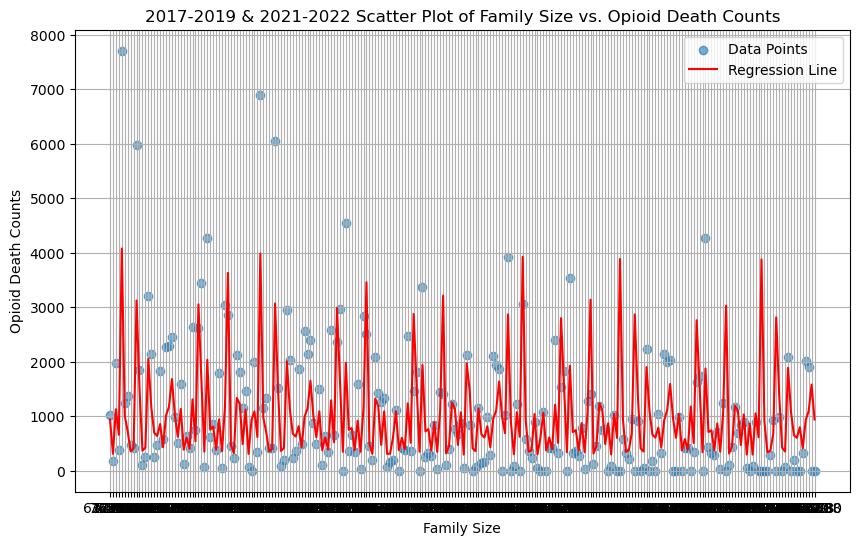

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming merged_opioid_family_size is your DataFrame
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_opioid_family_size['Estimated Total Family Household(Householder Living Alone)'], 
            merged_opioid_family_size['Total Opioid Deaths'], alpha=0.6, label='Data Points')

# Define the independent variable (X) and dependent variable (y)
X = merged_opioid_family_size['Estimated Total Family Household(Householder Living Alone)'].astype(float)
y = merged_opioid_family_size['Total Opioid Deaths'].astype(float)

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the predicted values for the regression line
predictions = model.predict(X)

# Plot the regression line
plt.plot(merged_opioid_family_size['Estimated Total Family Household(Householder Living Alone)'], 
         predictions, color='red', label='Regression Line')

# Customize the plot
plt.title('2017-2019 & 2021-2022 Scatter Plot of Family Size vs. Opioid Death Counts')
plt.xlabel('Family Size')
plt.ylabel('Opioid Death Counts')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the regression results
plt.show()

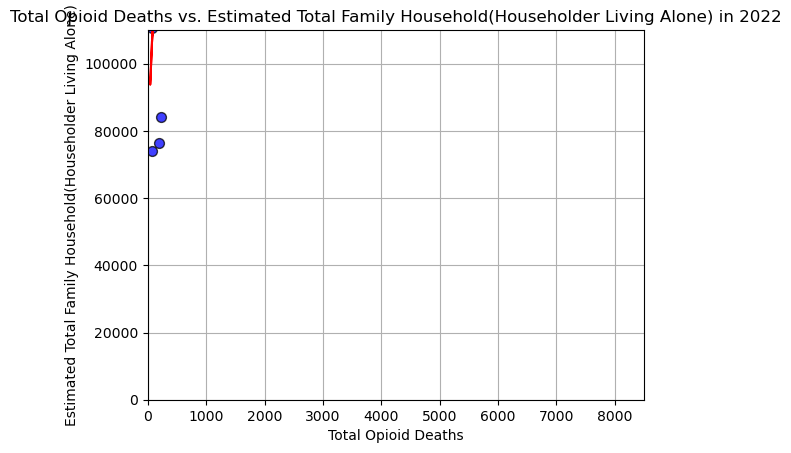

In [73]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

merged_opioid_family_size["Total Opioid Deaths"] = pd.to_numeric(merged_opioid_family_size["Total Opioid Deaths"], errors='coerce')
merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"] = pd.to_numeric(merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"], errors='coerce')
merged_opioid_family_size = merged_opioid_family_size.dropna(subset=["Total Opioid Deaths", "Estimated Total Family Household(Householder Living Alone)"])

merged_opioid_family_size_2022 = merged_opioid_family_size[merged_opioid_family_size["Year"] == 2022]

x_values = merged_opioid_family_size_2022["Total Opioid Deaths"]
y_values = merged_opioid_family_size_2022["Estimated Total Family Household(Householder Living Alone)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)
plt.xlabel("Total Opioid Deaths")
plt.ylabel("Estimated Total Family Household(Householder Living Alone)")
plt.title("Total Opioid Deaths vs. Estimated Total Family Household(Householder Living Alone) in 2022")
plt.grid(True)

plt.show()

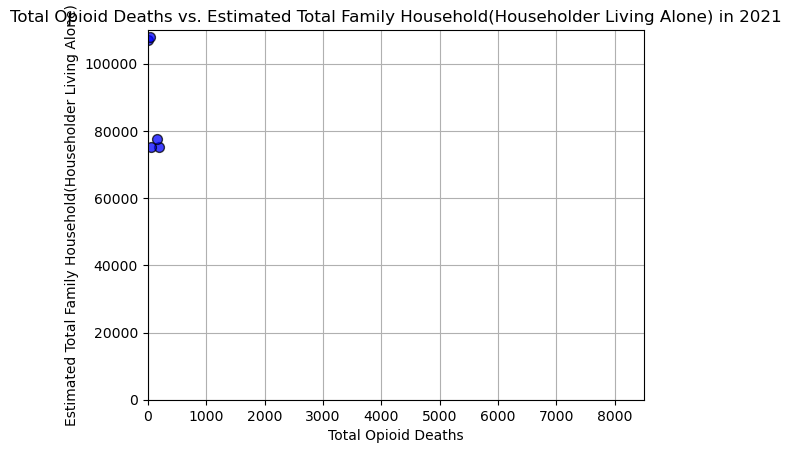

In [72]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

merged_opioid_family_size["Total Opioid Deaths"] = pd.to_numeric(merged_opioid_family_size["Total Opioid Deaths"], errors='coerce')
merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"] = pd.to_numeric(merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"], errors='coerce')
merged_opioid_family_size = merged_opioid_family_size.dropna(subset=["Total Opioid Deaths", "Estimated Total Family Household(Householder Living Alone)"])

merged_opioid_family_size_2021 = merged_opioid_family_size[merged_opioid_family_size["Year"] == 2021]

x_values = merged_opioid_family_size_2021["Total Opioid Deaths"]
y_values = merged_opioid_family_size_2021["Estimated Total Family Household(Householder Living Alone)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)
plt.xlabel("Total Opioid Deaths")
plt.ylabel("Estimated Total Family Household(Householder Living Alone)")
plt.title("Total Opioid Deaths vs. Estimated Total Family Household(Householder Living Alone) in 2021")
plt.grid(True)

plt.show()


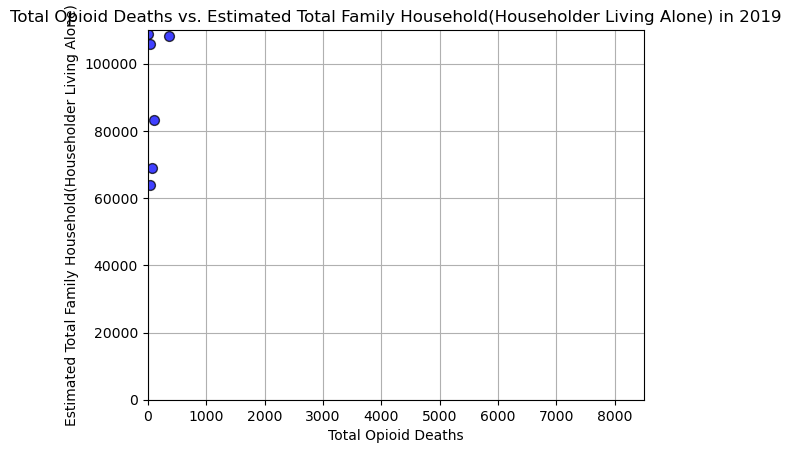

In [74]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

merged_opioid_family_size["Total Opioid Deaths"] = pd.to_numeric(merged_opioid_family_size["Total Opioid Deaths"], errors='coerce')
merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"] = pd.to_numeric(merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"], errors='coerce')
merged_opioid_family_size = merged_opioid_family_size.dropna(subset=["Total Opioid Deaths", "Estimated Total Family Household(Householder Living Alone)"])

merged_opioid_family_size_2019 = merged_opioid_family_size[merged_opioid_family_size["Year"] == 2019]

x_values = merged_opioid_family_size_2019["Total Opioid Deaths"]
y_values = merged_opioid_family_size_2019["Estimated Total Family Household(Householder Living Alone)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)
plt.xlabel("Total Opioid Deaths")
plt.ylabel("Estimated Total Family Household(Householder Living Alone)")
plt.title("Total Opioid Deaths vs. Estimated Total Family Household(Householder Living Alone) in 2019")
plt.grid(True)

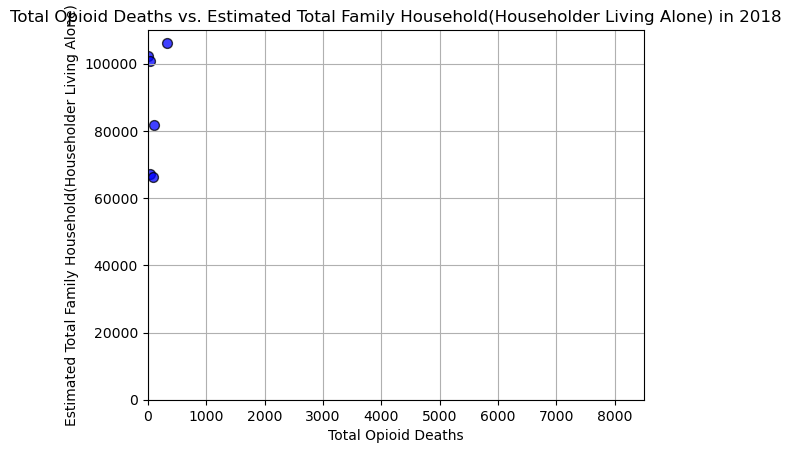

In [75]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

merged_opioid_family_size["Total Opioid Deaths"] = pd.to_numeric(merged_opioid_family_size["Total Opioid Deaths"], errors='coerce')
merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"] = pd.to_numeric(merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"], errors='coerce')
merged_opioid_family_size = merged_opioid_family_size.dropna(subset=["Total Opioid Deaths", "Estimated Total Family Household(Householder Living Alone)"])

merged_opioid_family_size_2018 = merged_opioid_family_size[merged_opioid_family_size["Year"] == 2018]

x_values = merged_opioid_family_size_2018["Total Opioid Deaths"]
y_values = merged_opioid_family_size_2018["Estimated Total Family Household(Householder Living Alone)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)
plt.xlabel("Total Opioid Deaths")
plt.ylabel("Estimated Total Family Household(Householder Living Alone)")
plt.title("Total Opioid Deaths vs. Estimated Total Family Household(Householder Living Alone) in 2018")
plt.grid(True)

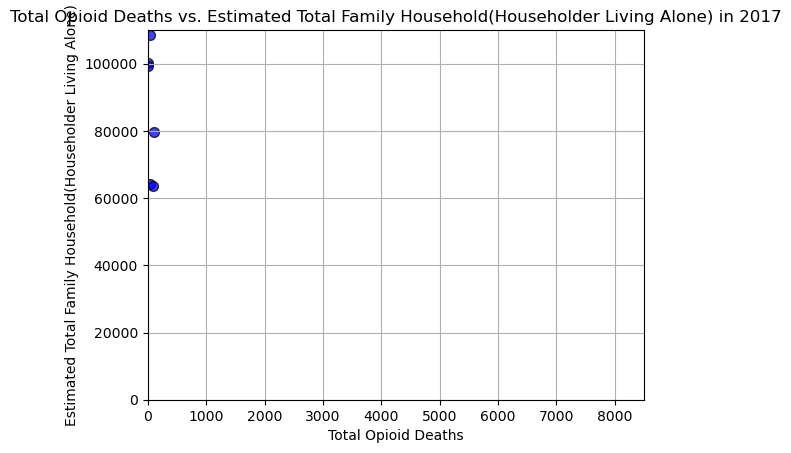

In [76]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

merged_opioid_family_size["Total Opioid Deaths"] = pd.to_numeric(merged_opioid_family_size["Total Opioid Deaths"], errors='coerce')
merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"] = pd.to_numeric(merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"], errors='coerce')
merged_opioid_family_size = merged_opioid_family_size.dropna(subset=["Total Opioid Deaths", "Estimated Total Family Household(Householder Living Alone)"])

merged_opioid_family_size_2017 = merged_opioid_family_size[merged_opioid_family_size["Year"] == 2017]

x_values = merged_opioid_family_size_2017["Total Opioid Deaths"]
y_values = merged_opioid_family_size_2017["Estimated Total Family Household(Householder Living Alone)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)
plt.xlabel("Total Opioid Deaths")
plt.ylabel("Estimated Total Family Household(Householder Living Alone)")
plt.title("Total Opioid Deaths vs. Estimated Total Family Household(Householder Living Alone) in 2017")
plt.grid(True)